# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [5]:
y_train[333]

8

Check the actual image

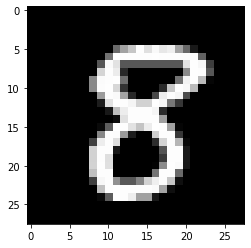

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [10]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2471 - acc: 0.9242 - val_loss: 0.1186 - val_acc: 0.9620
Epoch 2/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1014 - acc: 0.9687 - val_loss: 0.0890 - val_acc: 0.9736
Epoch 3/30
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0759 - acc: 0.9776 - val_loss: 0.0779 - val_acc: 0.9778
Epoch 4/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0601 - acc: 0.9815 - val_loss: 0.0772 - val_acc: 0.9821
Epoch 5/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0821 - val_acc: 0.9793
Epoch 6/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0412 - acc: 0.9870 - val_loss: 0.0889 - val_acc: 0.9802
Epoch 7/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0382 - acc: 0.9887 - val_l

Use Keras evaluate function to evaluate performance on the test set

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17722185528875012
Test accuracy: 0.983


Interpret the result

#type your answer here

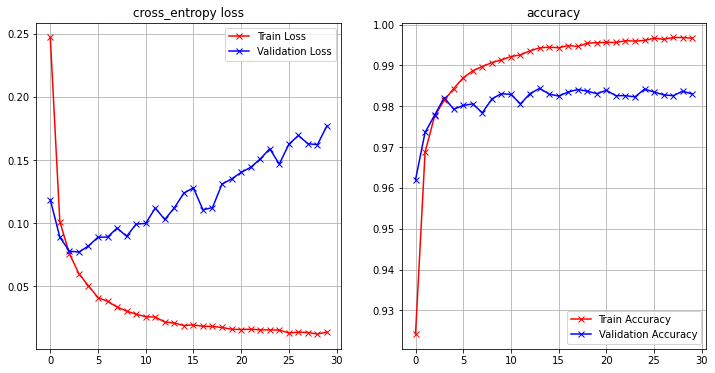

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Interpret the result

- The graph shows that the performance of the model is very good, wherein the accuracy of the validation and training collided, as well as the loss of the training and validation; seeing that it is near to each other when the epoch reached 20, resulting in a good performance and no overfitting.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [25]:
## Create the Network
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='sigmoid'))

In [26]:
## Summary of the model
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


<br><br><br>

| Previous model | My model |
| :-: | :-: |
| 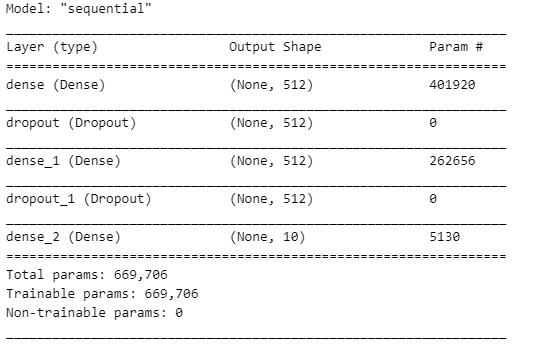 | 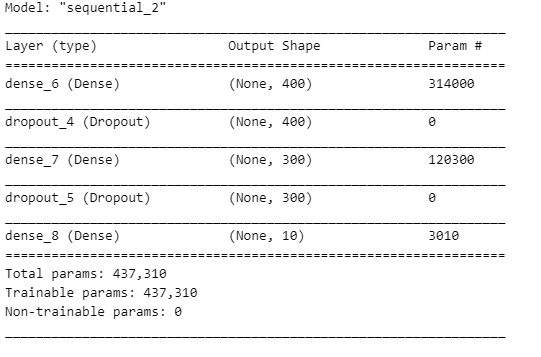 |

**How many parameters does your model have?  How does it compare with the previous model?**
- The previous model has about 669,706 parameters, while my model `model_1` has has 437,310 total parameters. We can also observe that the input layer of the previous model has 64 neurons while my model has 400 nuerons; the output layers of the previous model is 10 as it has 10 columns for its y variables, which symbolizes the 10 numbers, it is also the same number of neurons in `model_1`.

In [27]:
## 1st model
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
 
history_1 = model_1.fit(
    x_train, y_train,
    batch_size = 128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3734 - acc: 0.8880 - val_loss: 0.1410 - val_acc: 0.9551
Epoch 2/20
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1624 - acc: 0.9518 - val_loss: 0.0937 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1252 - acc: 0.9635 - val_loss: 0.0854 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1066 - acc: 0.9689 - val_loss: 0.0846 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0979 - acc: 0.9722 - val_loss: 0.0852 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0852 - acc: 0.9760 - val_loss: 0.0813 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0780 - acc: 0.9778 - val_l

In [28]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 1.1920930376163597e-07
Test accuracy: 0.098


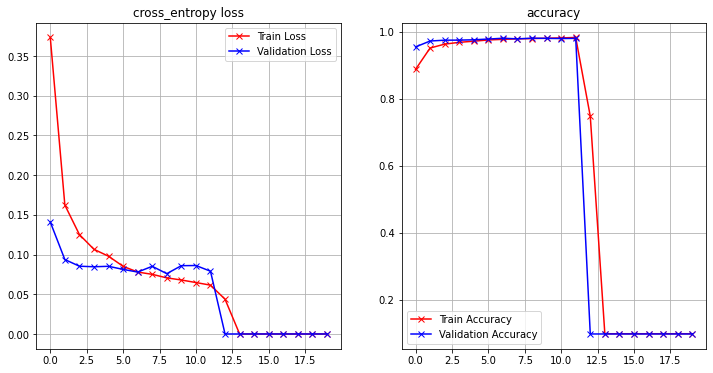

In [29]:
plot_loss_accuracy(history_1)

In [20]:
## 2nd model
from tensorflow.keras import regularizers

model_2 = Sequential([
    Dense(1500, activation='relu', input_shape=(784,), 
          kernel_regularizer=regularizers.l2(0.001)), ## added l2 regulizers
    Dropout(0.3),
    Dense(1000, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.15),
    Dense(10, activation='sigmoid')
])

In [21]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 2,688,510
Trainable params: 2,688,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

 
history_2 = model_2.fit(
    x_train, y_train,
    batch_size = 600,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 42us/sample - loss: 1.4757 - acc: 0.8932 - val_loss: 0.7757 - val_acc: 0.9552
Epoch 2/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6092 - acc: 0.9545 - val_loss: 0.4547 - val_acc: 0.9640
Epoch 3/30
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3977 - acc: 0.9618 - val_loss: 0.3339 - val_acc: 0.9665
Epoch 4/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2973 - acc: 0.9683 - val_loss: 0.2594 - val_acc: 0.9716
Epoch 5/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2628 - acc: 0.9682 - val_loss: 0.2503 - val_acc: 0.9685
Epoch 6/30
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2463 - acc: 0.9688 - val_loss: 0.2224 - val_acc: 0.9739
Epoch 7/30
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2327 - acc: 0.9694 - val_loss: 0.

In [23]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.16449890614748
Test accuracy: 0.9784


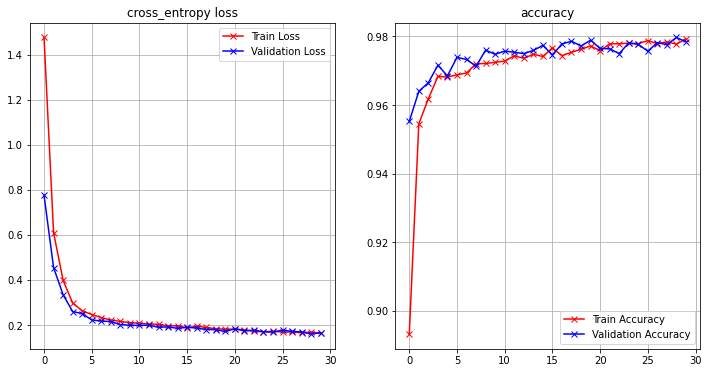

In [24]:
plot_loss_accuracy(history_2)

<br><br><br>

| Model 1 | Model 2 |
| :-: | :-: |
| 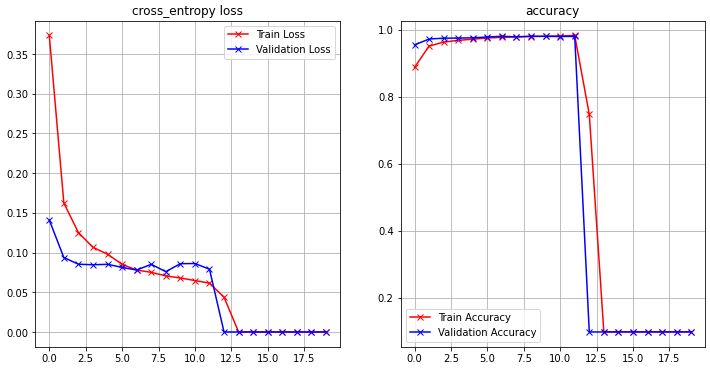 | 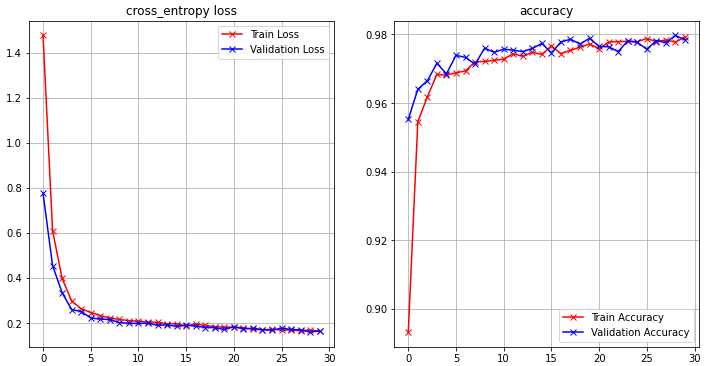 |

**Compare the accuracy and loss (training and validation) of model_1 and model_2**
- From the `model_1`'s loss, it dropped and formed a plateu between 10.0 to 12.5 epochs which would mean that the model had no errors from that point onwards. Its accuracy was high at some point but dropped significantly, causing the model to have a really bad performance score of **9.8%**. The `model_2`'s loss provided a much more smooth and consistent graph, its validation loss also combined with its training loss, showing very small loss, almost no loss; The validation and training accuracy of `model_2` does not show any big fluctuation unlike `model_1`, it does not show any overfitting ans has a better preformance than `model_1` having an accuracy of **97.84%**

#### Conclusion

***During the activity, I was able to get the concept of regulizing data. By regulizing data we are able to minimize loss in the model making it more accurate and less complex, it has the same concept of standardizing data where we close the gap between large and small values by making them smaller. Adding regulizers in the model, making its accurate and reducing losses in the model. During model training I was also able to understand how output layers work, the neurons has to be the same number of columns you have in the y variable; in this case it was 10 since the outputs are ranging from 0-9, True or False; this can also be done on other datasets that has their labels one-hot encoded.***